# Setup



In [ ]:
!pip install geopandas

In [ ]:
import os
import geopandas as gpd
from google.colab import files

In [ ]:
if not os.path.exists('Limiti01012020'):
    # download the data
    import requests, zipfile, io
    zip_file_url = 'http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012020.zip'
    #request the file
    r = requests.get(zip_file_url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    #unzip the file
    z.extractall()
    os.chdir('Limiti01012020')
else:
    os.chdir('Limiti01012020')


---
# Exercise
- load the shapefile of ISTAT with the information of the provinces
- filter it for an italian provice at your choice (eg. Trento)
- plot it
- identify the cities of the province selected with the biggest and smallest area
- extract all the centroids of the areas expressed in WGS84
- extract a rappresenative point for the area of a municipality in WGS84<br/>suggestion: *.representative_point()*
- save the points in a GeoJSON file
- calculate the distance on the geodentic between the municipaly with the big area and smallest area by using the centroid
---


In [ ]:
os.chdir('ProvCM01012020')

In [ ]:
provinces = gpd.read_file('ProvCM01012020_WGS84.shp')

In [ ]:
provinces.head(5)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.826908e+09,593389.667001,"POLYGON ((411015.006 5049970.983, 411070.006 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,2.081602e+09,458754.449021,"POLYGON ((437900.552 5088796.204, 437915.021 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,1.340250e+09,276722.284585,"POLYGON ((459146.367 5079451.275, 459180.648 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,6.894828e+09,542063.983810,"MULTIPOLYGON (((418682.124 4967085.107, 418717..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,1.510170e+09,356521.052241,"POLYGON ((423634.299 4998152.373, 423642.986 4..."


In [ ]:
# I choose Trento
provinces[provinces.DEN_PROV == 'Trento']

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,SHAPE_LEN,geometry
21,2,4,22,0,22,Trento,-,Trento,TN,Provincia autonoma,6.206864e+09,642828.097848,"POLYGON ((716619.251 5156007.804, 716666.391 5..."


In [ ]:
# move to another directory
os.chdir('..')

In [ ]:
os.chdir('Com01012020')

In [ ]:
municipalities = gpd.read_file('Com01012020_WGS84.shp')

In [ ]:
municipalities.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'PRO_COM',
       'PRO_COM_T', 'COMUNE', 'COMUNE_A', 'CC_UTS', 'SHAPE_LENG', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry'],
      dtype='object')

In [ ]:
# filter the province
provincia_trento = municipalities[municipalities.COD_PROV==22]

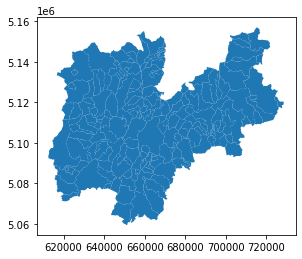

In [ ]:
# plot it
provincia_trento.plot()

In [ ]:
# find the max area
max_area = provincia_trento.geometry.area.max()

In [ ]:
# find the min area
min_area = provincia_trento.geometry.area.min()

In [ ]:
# identify the big municipality
big_municipality = provincia_trento[provincia_trento.geometry.area == max_area]

In [ ]:
# identify the small municipality
small_municipality = provincia_trento[provincia_trento.geometry.area == min_area]

In [ ]:
big_municipality.COMUNE

7006    Primiero San Martino di Castrozza
Name: COMUNE, dtype: object

In [ ]:
small_municipality.COMUNE

3034    Carzano
Name: COMUNE, dtype: object

In [ ]:
# calculate centroids in WGS84
municipalities.to_crs({'init': 'epsg:4326'}).geometry.centroid

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0        POINT (7.90239 45.50395)
1        POINT (7.64760 45.42281)
2        POINT (7.23241 45.05071)
3        POINT (7.41992 45.11818)
4        POINT (7.57659 45.40652)
                  ...            
7899    POINT (12.46087 41.88564)
7900    POINT (13.61312 37.74439)
7901    POINT (13.56882 37.79345)
7902    POINT (11.24166 46.25081)
7903    POINT (12.52284 42.08411)
Length: 7904, dtype: geometry

In [ ]:
# identify represenative points
representative_points = municipalities.to_crs({'init': 'epsg:4326'}).geometry.representative_point()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
representative_points

0        POINT (7.90721 45.50452)
1        POINT (7.64806 45.42288)
2        POINT (7.20902 45.04197)
3        POINT (7.42123 45.12015)
4        POINT (7.57821 45.40602)
                  ...            
7899    POINT (12.47223 41.87964)
7900    POINT (13.62034 37.74468)
7901    POINT (13.57546 37.79150)
7902    POINT (11.23832 46.25279)
7903    POINT (12.52274 42.08242)
Length: 7904, dtype: geometry

In [ ]:
# create geojson
representative_points.to_file('points.geojson',driver='GeoJSON')

In [ ]:
files.download('points.geojson') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# calculate distances
p1 = small_municipality.geometry.centroid

In [ ]:
p2 = big_municipality.geometry.centroid

In [ ]:
p1.geometry[p1.index[0]].distance(p2.geometry[p2.index[0]])

31887.311737796343